# A7 - Artificial Neural Networks
### Martin Hansson

Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [ ]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.regularizers import l2

import numpy as np

In [ ]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 0s 0us/step


**Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

## 1
In the first two lines we convert values in the training and test data from int to float32.

In the next two lines we normalize the training and test data. The pixel values in the data is normalized from a value between 0 and 255 to 
a value between 0 and 1.

The last two lines transforms the labels from a single value to a vector representing the calss in question. In our case we have 10 
classes, 0- 9, and each number is transformed to a vector where the lable is represented as a 1 in the position in the vector
which represents that number and all the others are 0. E.g the numeber 3 is represented as [0,0,0,1,0,0,0,0,0,0].



In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)


fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.8309 - accuracy: 0.7593 - val_loss: 0.2483 - val_accuracy: 0.9290
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9275 - val_loss: 0.1855 - val_accuracy: 0.9468
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1795 - accuracy: 0.9488 - val_loss: 0.1685 - val_accuracy: 0.9503
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1504 - accuracy: 0.9564 - val_loss: 0.1474 - val_accuracy: 0.9576
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9628 - val_loss: 0.1241 - val_accuracy: 0.9615
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9680 - val_loss: 0.1126 - val_accuracy: 0.9662
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0944 - accuracy: 0.9716 - val_loss: 0.1109 - val_accuracy: 0.9665
Epoch 

## 2 a
The model has 4 layers.

Layer #1 has 784 neurons (input layer)

Layer #2 has 64 neurons and is a fully connected 

Layer #3 has 64 neurons and is a fully connected

Layer #4 has 10 neurons and is fully connected

The input layer has no activation function since it is a input layer

The two following layers have relu as activation function. Relu is shown to be a good activation function in many cases since
its gradient doesn't saturate in the same way as, for example sigmoid does.

Th last layer has softmax as its activation function since it is a good activation function for this type of classification
problems. The 10 neurons in the output layer can be interpreted as the probability that the data feed through the network is a 
certain number. E.g if the output from the outputlayer is [0,0,0,0.8,0,0,0,0.2,0)], (each number represents the output from each
neuron), the network "thinks" the input is a 3 with a prbability of 0.8 and a 8 with hte probability of 0.2. In this cas we
therfore classify the input as a 3.

The number of parameters of the network is 55,050.

The reason for the shape of the input layer is the mnist dataset. Each number is represented as a picture with 28 by 28 pixels.
In this network we flattens the the picture and represent is as a one dimensional vector with a length of 28*28 which is 784.

We have 10 output neurons since we have 10 classes in this problem. 



## 2b
The loss function used is called categorical crossentropy. 
The Mathematical expression for categorical crossentropy is:

$Loss = -\sum_{i=0}^{n_{output}}y_i\log \hat y_i  $


In this case where each input only belongs to one and only one class, our loss function is
-log(output from the "correct" neuron ), all other terms in the sum will be 0. The function fits our purposes well since it 
measures how far away the neural nets prediction is from the target. I guess using log works fine since it penalize us pretty
hard when we are far off target and it wont be as "tough" on us when we are  getting closer. 



## 2c


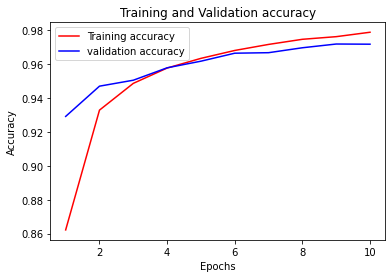

In [ ]:
train_accuracy = fit_info.history['accuracy']
val_accuracy = fit_info.history['val_accuracy']
ep = range (1, epochs+1)
plt.plot(ep, train_accuracy, 'r', label='Training accuracy')
plt.plot(ep,val_accuracy , 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 2D

In [ ]:
# Takes along tim to train about 30-45 min

epochs = 40
reg_factors = [0.000001, 0.00025, 0.0005, 0.00075, 0.001]
num_of_replicates = 3
models = len(reg_factors) * [num_of_replicates * [0]] 

initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=0.01)

results = np.zeros((len(reg_factors), num_of_replicates))


## Define model ##
for i in range (len(reg_factors)) : 
    for j in range (num_of_replicates) :
        models[i][j] = Sequential()

        models[i][j].add(Flatten())
        models[i][j].add(Dense(500, kernel_regularizer = l2(reg_factors[i]), kernel_initializer = initializer, activation = 'relu'))
        models[i][j].add(Dense(300, kernel_regularizer = l2(reg_factors[i]), kernel_initializer=initializer, activation = 'relu'))
        models[i][j].add(Dense(num_classes, activation='softmax'))
        
        print(reg_factors[i])

        models[i][j].compile(loss=keras.losses.categorical_crossentropy,
                            optimizer='adam',
                            metrics=['accuracy'])

        fit_info = models[i][j].fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(x_test, y_test))

        score = models[i][j].evaluate(x_test, y_test, verbose=1)
        #print(score)
        results[i][j] = score[1] 


mean_results = np.mean(results, axis=1)
max_results = np.max(results, axis=1)
std_results = np.std(results, axis=1)



1e-06
313/313 [==============================] - 1s 2ms/step - loss: 0.1066 - accuracy: 0.9848
1e-06
313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9842
1e-06
313/313 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9830
0.00025
313/313 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9757
0.00025
313/313 [==============================] - 1s 4ms/step - loss: 0.1131 - accuracy: 0.9805
0.00025
313/313 [==============================] - 1s 4ms/step - loss: 0.1192 - accuracy: 0.9776
0.0005
313/313 [==============================] - 1s 4ms/step - loss: 0.1162 - accuracy: 0.9805
0.0005
313/313 [==============================] - 1s 3ms/step - loss: 0.1191 - accuracy: 0.9778
0.0005
313/313 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9767
0.00075
313/313 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.9762
0.00075
313/313 [======================

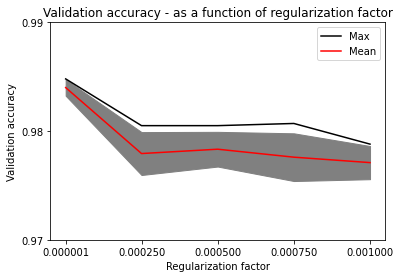

The highest validation accuracy we achived was:
0.9848


In [ ]:
plt.plot(reg_factors, max_results, 'black', label = 'Max')
plt.plot(reg_factors, mean_results, 'red', label = 'Mean')
plt.fill_between(reg_factors, mean_results - std_results, mean_results + std_results, color="gray")
plt.title('Validation accuracy - as a function of regularization factor')
plt.xlabel('Regularization factor')
plt.ylabel('Validation accuracy')
plt.yticks([0.97,0.98,0.99])
plt.xticks(reg_factors)
plt.legend()
plt.show()

print('The highest validation accuracy we achived was:')
print(np.around(np.max(results), 4))

## 2D, cont
In the plot above one can see the max and mean value of the validation accuracy for each reqularization factor. 
The grey area around the mean is the standard deviation of the 3 results for each reqularization factor.
Reasons why we might not acheive tha same results as Hinton did could be different weight initialization and/or 
different optimizer, eg different lerarning rate. Since the algorithm isn't deteministic there also might be some difference 
due to chance.

## 3

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 48)        10416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 576)             

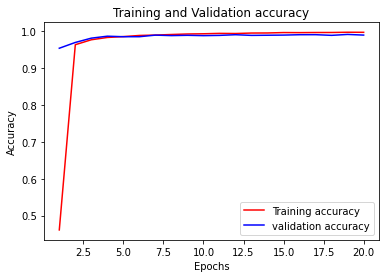

Test loss: 0.031982313841581345, Test accuracy 0.9900000095367432


In [ ]:
# Takes about 15 min to train
epochs = 20

#opt= optimizers.SGD(lr = 0.01, momentum = 0.9)  
initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=0.01)

model3 = tf.keras.models.Sequential()
model3.add(tf.keras.Input(shape=(28, 28, 1)))
model3.add(Conv2D(24, 3, padding = 'same', activation = 'relu', kernel_initializer=initializer))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(48, 3,  padding = 'same', activation = 'relu', kernel_initializer=initializer))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, 3,  padding = 'same', activation = 'relu', kernel_initializer=initializer))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(10, activation='softmax'))

print(model3.summary())

model3.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.SGD(lr = 0.01, momentum = 0.95),
            metrics=['accuracy'])


fit_info = model3.fit(x_train, y_train,
           batch_size=batch_size, shuffle = True,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model3.evaluate(x_test, y_test, verbose=0)



train_accuracy = fit_info.history['accuracy']
val_accuracy = fit_info.history['val_accuracy']
ep = range (1, epochs+1)
plt.plot(ep, train_accuracy, 'r', label='Training accuracy')
plt.plot(ep,val_accuracy , 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))


## 3A
We used the model in the code above and got a validation accuracy of above 99 %. Except for convolutional layers we used 3 
2d maxpooling layers. A pooling layer reduces the dimensionality data by summarizing a number of neurons in its corresponding 
convolutional layer into a single number. In our case take tha maximum value of every 2 by 2 square of the nearby convolutional 
layer. Ther are other ways than max to make the pooling, eg using mean. These layers are used to reduce dimensionality of tha data 
and make the model less sensitive to the position of features in the feature maps.


## 3B
Convolutional neural networks have fewer neurons and are therefore cheaper to train (i.e. less computation time) and fewer neurons also reduces the risk of overfitting. They are very useful for image recognition tasks where we are interested in detecting certain features in the images, such as veritcal lines, horizontal lines, circles, edges, corners etc. You can say that we want to find high gradients in the matrix, i.e. where the image changes color. Large area with pixels of same color does not give any useful information for feature recognition and hence, the problem size can be reduced by introducing conventional layers. The feature maps in each layer "learns" to recognize different features in the picture. This is especially useful for recognizing hand-written numbers or letters where we want to identify certain shapes.  

### Question 4) Auto-Encoder for denoising


In [ ]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [ ]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 6s 6ms/step - loss: 0.2404 - val_loss: 0.1504
Epoch 2/32
938/938 [==============================] - 6s 6ms/step - loss: 0.1477 - val_loss: 0.1386
Epoch 3/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1368 - val_loss: 0.1320
Epoch 4/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1310 - val_loss: 0.1298
Epoch 5/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1277 - val_loss: 0.1274
Epoch 6/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1253 - val_loss: 0.1256
Epoch 7/32
938/938 [==============================] - 6s 6ms/step - loss: 0.1235 - val_loss: 0.1245
Epoch 8/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1223 - val_loss: 0.1236
Epoch 9/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1212 - val_loss: 0.1233
Epoch 10/32
938/938 [==============================] - 5s 6ms/step - loss: 0.1207 - val_loss: 0.1224

## 4A
See attached jpg-file for the diagram of the of the model.
The purpose of this model is to learn to remove noise from MNIST-digits. During traning we use distorted 
version of MNIST-digits as input and we feed them forward through the network. The output layer have the same number of neurons 
as the input layer. We use the non distorted version of the number we fed the network as our target and computes the loss, (difference
between the output and the non distorted number), then we update the weight and biases of our network using backpropagation. The Loss
function used in this case is called binary crossentropy it gives us a measurement of how close we are from our target. There is no
difference in this sense compared to the other networks in this assignment. We have an input which we feed through the network
and we have a target for that input.
In this model we reduce the dimensionality of the data from 784 to 96 in the middle. 


## 4B

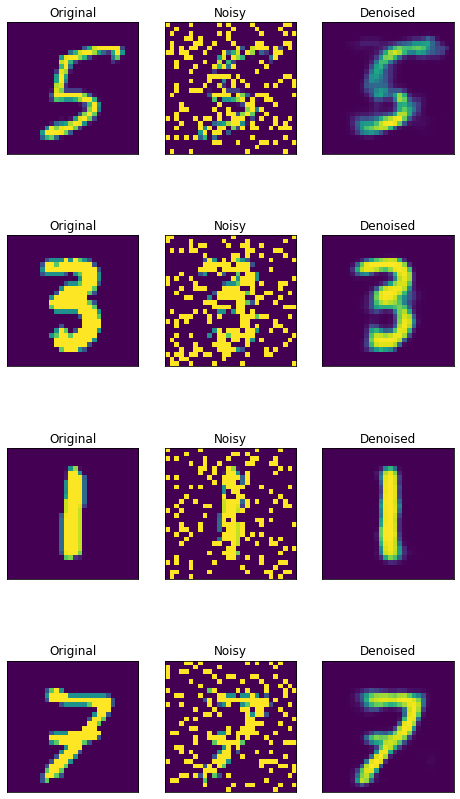

In [ ]:
# Create our own small test set, 4 randomly chosen digits

our_test_digits = np.array([x_test[23], x_test[68], x_test[196], x_test[510]])
our_noisy_test_digits = salt_and_pepper(our_test_digits, noise_level=0.4)
our_noisy_test_digits_flattened = our_noisy_test_digits.reshape(-1,784)

denoised_data = autoencoder.predict(our_noisy_test_digits_flattened)
denoised_data = denoised_data.reshape(4,28,28,1)


plt.figure(figsize=(8, 15))


for i in range (len(our_test_digits)): 
    sp = i * 3
    plt.subplot(4, 3, sp+1)
    plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
    plt.imshow(our_test_digits[i])
    plt.title('Original')
    plt.subplot(4, 3, sp+2)
    plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)
    plt.imshow(our_noisy_test_digits[i])
    plt.title('Noisy')
    plt.subplot(4, 3, sp+3)
    plt.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)    
    plt.imshow(denoised_data[i])
    plt.title('Denoised')
plt.show()
    


## 4B cont.
At a noise level of 0.6 the seven in our sample gets hard to identify. At a noise level of 0.7 the denoising seems to stop 
working, almost no digits are recognizable.   

## 4C

In [ ]:
flattened_x_test = x_test.reshape(-1,784)

labels = lbl_test #np.argmax(y_test, axis = 1)
noise_levels = []
noisy_prediction_accuracy = []
denoised_prediction_accuracy = []

for i in range (26) :
    noise_level = i/25
    print(noise_level)
    noisy_x_test = salt_and_pepper(x_test, noise_level=noise_level)
    denoised_x_test = autoencoder.predict(noisy_x_test.reshape(-1,784)).reshape(-1,28,28,1)

    m3_predictions_denoised = model3.predict(denoised_x_test)
    m3_predictions_denoised = np.argmax(m3_predictions_denoised, axis = 1)

    m3_predictions_noisy = model3.predict(noisy_x_test)
    m3_predictions_noisy = np.argmax(m3_predictions_noisy, axis = 1)

    num_of_correct_noisy_predictions = 0
    num_of_correct_denoised_predictions = 0

    for j in range(len(labels)) :
        if m3_predictions_noisy[j] == labels[j] :
            num_of_correct_noisy_predictions +=1
        if m3_predictions_denoised[j] == labels[j] :
            num_of_correct_denoised_predictions +=1
    noise_levels.append(noise_level)
    noisy_prediction_accuracy.append(num_of_correct_noisy_predictions/len(labels))
    denoised_prediction_accuracy.append(num_of_correct_denoised_predictions/len(labels))


0.0
0.04
0.08
0.12
0.16
0.2
0.24
0.28
0.32
0.36
0.4
0.44
0.48
0.52
0.56
0.6
0.64
0.68
0.72
0.76
0.8
0.84
0.88
0.92
0.96
1.0


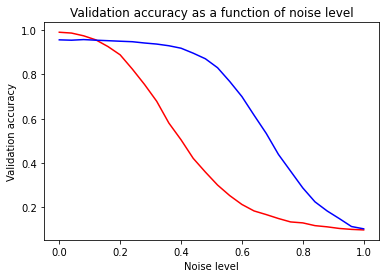

In [ ]:
plt.plot(noise_levels, noisy_prediction_accuracy, 'r', label='Noisy digits')
plt.plot(noise_levels, denoised_prediction_accuracy, 'b', label='Denoised digits')
plt.title('Validation accuracy as a function of noise level')
plt.xlabel('Noise level')
plt.ylabel('Validation accuracy')
plt.show()

## 4C, Cont
The plot shows that denoising increases accuracy significantly when noise levels are high. This shows that the autoencoder 
reproduces noisy digits pretty well.The disadvantage is that we lose some accuracy when the noise levels are low, under 0.2. 
Whether to use the autoencoder or not depends on the data you want to classify. If it contains no or limited amounts of 
noise it is probably good not to use the autoencoder, if tha data is noisy, using the autoencoder might improve the 
classification accuracy.   

## 4D

In [ ]:
# Pick the 5:s  from the training dataset
five_list = []
index = 0
for number in lbl_train :
    if number == 5 :
        five_list.append(flattened_x_train[index])
    index += 1

Synthetic 5:s based on mean and standard deviation


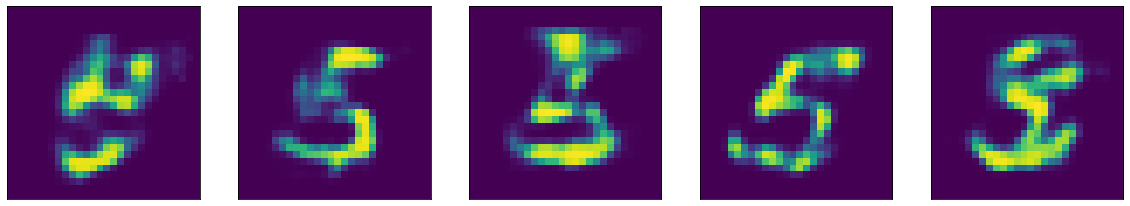

In [ ]:
import random


five_list = np.array(five_list)

encoded_fives = encoder_only.predict(five_list)
encoded_fives_mean = np.mean(encoded_fives, axis = 0)
encoded_fives_std = np.std(encoded_fives, axis = 0)

# create 5 synthetic 5:s

synt_fives = []
for i in range (5) :
    synt_five = []
    for j in range(latent_dim) :
        synt_five.append(random.normalvariate(encoded_fives_mean[j], encoded_fives_std[j]))
    synt_fives.append(synt_five)

synthetic_fives = decoder.predict(np.array(synt_fives)).reshape(-1,28,28,1)




print('Synthetic 5:s based on mean and standard deviation')


plt.figure(figsize=(20, 20))

for i in range (len(synthetic_fives)) :
    plt.subplot(1, 5, i+1)
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.imshow(synthetic_fives[i])
plt.show()


## 4D, cont
One  way to do it could be to take all the internal representations (96 dim), for each number in the dataset and 
calculate the mean and standard deviation for every dimension in the internal representation. We could then use this 
distribution to sample new internal representation and feed them through the decoder to get new "synthetic digits". 
We tried this method for the digit 5 and we have plotted 5 sythetic 5:s.

Another way could be to take different 5:s from the dataset and pass them through the encoder. This gived us an internal 
respresentation of the digits in 96 dimensions (latent_dim ). Then we can manipulate this representation by adding some noise, 
and then let the decoder create synthetic 5:s. 

We suppose just passing digits through the autoencoder, with or without noise, sort of produces synthetic digits.